✅ Data loaded successfully!
(1000, 13)
    Age  Sex  BloodPressure  Cholesterol   BMI  Smoking  Diabetes  Mean_HR  \
0  56.0    0          124.5        197.1  33.9        0         0     88.7   
1  48.3    1          132.8        149.3  20.5        0         1     76.3   
2  57.8    0          109.8        167.7  28.0        0         0     83.5   
3  68.3    1          115.4        164.9  32.0        1         0     87.2   
4  47.2    0          148.0        207.3  35.1        0         0     78.4   

   HRV_SDNN  Power_LF  Power_HF  LF_HF_Ratio  RiskLabel  
0      47.9     632.3     866.8         0.73          1  
1      53.1     661.9     313.7         2.11          0  
2      36.3    1109.1     609.2         1.82          0  
3      43.8     686.0     774.1         0.89          0  
4      44.1     678.6     833.4         0.81          1  

Basic statistics:
                count       mean         std    min      25%     50%  \
Age            1000.0   50.24150   11.687113   20.0  

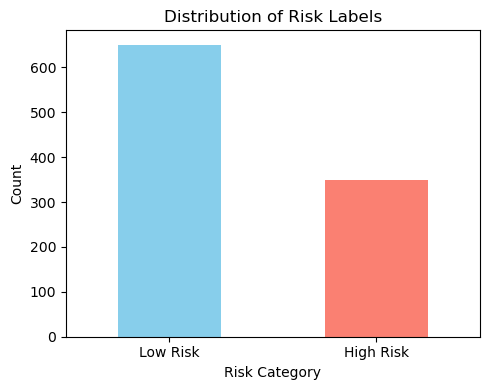

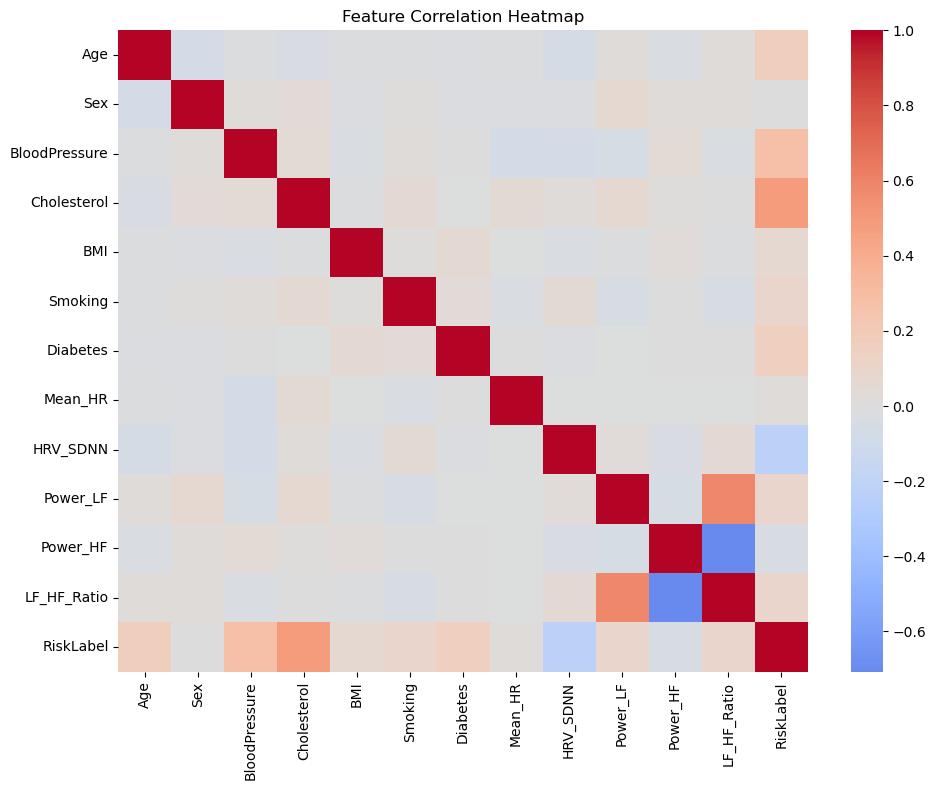

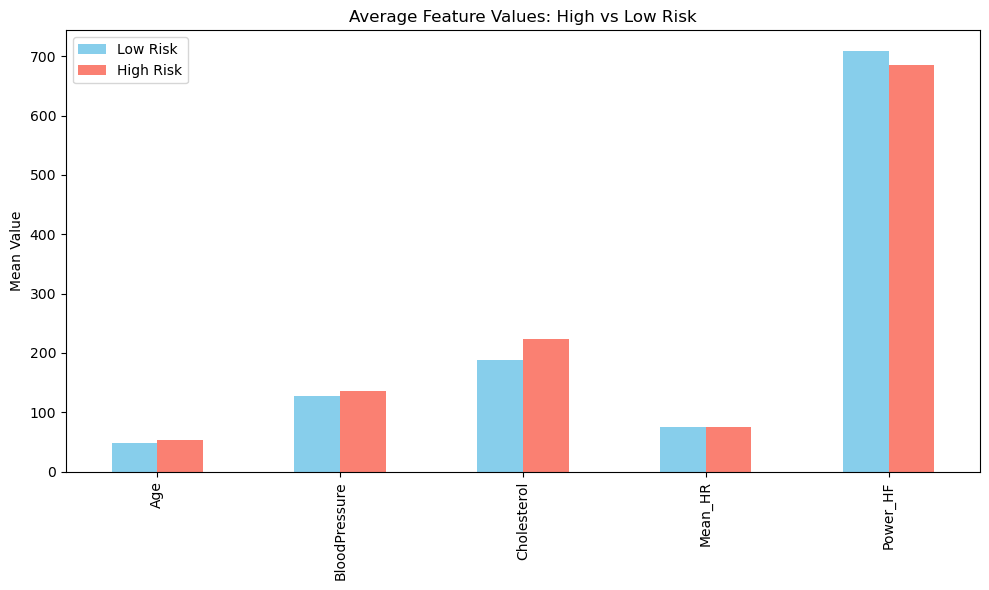

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---------- 1. Load Dataset ----------
df = pd.read_csv("../data/healthcare_dataset.csv")
print("✅ Data loaded successfully!")
print(df.shape)
print(df.head())

# ---------- 2. Quick Overview ----------
print("\nBasic statistics:")
print(df.describe().T)

# ---------- 3. Risk Distribution ----------
plt.figure(figsize=(5,4))
df["RiskLabel"].value_counts().plot(kind="bar", color=["skyblue", "salmon"])
plt.xticks([0,1], ["Low Risk", "High Risk"], rotation=0)
plt.title("Distribution of Risk Labels")
plt.xlabel("Risk Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# ---------- 4. Correlation Heatmap ----------
plt.figure(figsize=(10,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", center=0, annot=False)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()
# ---------- 5. Mean Comparison Bar Chart ----------
features_to_compare = ["Age", "BloodPressure", "Cholesterol", "Mean_HR", "Power_HF"]
group_means = df.groupby("RiskLabel")[features_to_compare].mean().T
group_means.columns = ["Low Risk", "High Risk"]

group_means.plot(kind="bar", figsize=(10,6), color=["skyblue", "salmon"])
plt.title("Average Feature Values: High vs Low Risk")
plt.ylabel("Mean Value")
plt.tight_layout()
plt.show()